In [1]:
from psycopg2.sql import SQL
import pandas as pd
import numpy as np
from delfos import MetaDAO
from sklearn.preprocessing import StandardScaler


/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df= pd.read_csv('data_05_shaft_bearing.csv')
df= pd.read_csv('data_05_shaft_bearing.csv')
df= df.dropna()
df=df[df['power']>100]
df= df[df['outdoor_temp']>0]
df= df[df['nacelle']>0]
df= df[df['generator_speed']>0]
df= df[df['gearbox_bearing']>0]
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df)

                      sample_time      power  outdoor_temp  generator_speed  \
0       2018-01-01 00:00:00+00:00  668.28204     32.369460        973.59010   
1       2018-01-01 00:10:00+00:00  396.09955     32.322247        851.24150   
2       2018-01-01 00:20:00+00:00  337.86740     32.230736        835.06190   
3       2018-01-01 00:30:00+00:00  326.90180     32.051624        830.00200   
4       2018-01-01 00:40:00+00:00  400.90637     31.891493        843.18300   
...                           ...        ...           ...              ...   
157809  2020-12-31 21:30:00+00:00  463.78204     30.680513        886.92694   
157810  2020-12-31 21:40:00+00:00  472.37115     30.551275        884.98804   
157811  2020-12-31 21:50:00+00:00  579.70490     30.431310        939.09460   
157812  2020-12-31 22:00:00+00:00  554.78850     30.328987        927.96220   
157813  2020-12-31 22:10:00+00:00  194.68222     30.234390        352.50555   

          nacelle  gearbox_bearing  
0       39.058

In [3]:
features = ['generator_speed', 'nacelle']
target = ['gearbox_bearing']
X = df[features]
y = df[target]

In [4]:
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [5]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [6]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [7]:
df.sample_time = pd.to_datetime(df.sample_time)
df[df['sample_time'] >= '2020-01-01']

,sample_time,power,outdoor_temp,generator_speed,nacelle,gearbox_bearing
105120,2020-01-01 00:00:00+00:00,159.13132,23.599184,830.04047,30.861166,54.868835
105121,2020-01-01 00:10:00+00:00,202.48657,23.685795,829.99540,31.020000,55.599167
105122,2020-01-01 00:20:00+00:00,230.56969,23.723827,830.04440,31.034334,55.779667
105123,2020-01-01 00:30:00+00:00,211.84170,23.614294,829.94810,31.041666,55.967167
105124,2020-01-01 00:40:00+00:00,104.15358,23.345901,829.99530,32.019833,56.393833
...,...,...,...,...,...,...
157809,2020-12-31 21:30:00+00:00,463.78204,30.680513,886.92694,39.403336,65.438670
157810,2020-12-31 21:40:00+00:00,472.37115,30.551275,884.98804,39.182835,64.908165
157811,2020-12-31 21:50:00+00:00,579.70490,30.431310,939.09460,39.011333,64.766170
157812,2020-12-31 22:00:00+00:00,554.78850,30.328987,927.96220,38.867000,64.691170


In [8]:
X_train= X[0:100000]
y_train= y[0:100000]
X_validation = X[10000:105120]
y_validation = y[10000:105120]
X_test= X[105120:]
y_test= y[105120:]

In [9]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_validation.shape)
print(y_validation.shape)

(100000, 2)
(100000, 1)
(24694, 2)
(24694, 1)
(95120, 2)
(95120, 1)


In [10]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
# create ANN model
model = Sequential()

Using TensorFlow backend.
/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ingridsimoes/anaconda3/lib/pytho

In [11]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(65,input_dim=2,  kernel_initializer='normal', activation='tanh'))
model.add(Dense(65, kernel_initializer='normal', activation='hard_sigmoid'))
model.add(Dense(65, kernel_initializer='normal', activation='hard_sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(65, kernel_initializer='normal', activation='hard_sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(65, kernel_initializer='normal', activation='hard_sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
opt=optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False
)

model.compile(loss='mae', optimizer=opt, metrics=['mse'])

In [13]:
# Fitting the ANN to the Training set
history= model.fit(X_train, y_train ,batch_size = 60, epochs = 50, validation_data=(X_validation, y_validation))

Instructions for updating:
Use tf.cast instead.
Train on 100000 samples, validate on 95120 samples
Epoch 1/50
100000/100000 [==============================] - 6s 57us/step - loss: 0.5077 - mse: 0.4300 - val_loss: 0.4738 - val_mse: 0.3499
Epoch 2/50
100000/100000 [==============================] - 7s 72us/step - loss: 0.4783 - mse: 0.3590 - val_loss: 0.4715 - val_mse: 0.3445
Epoch 3/50
100000/100000 [==============================] - 6s 64us/step - loss: 0.4684 - mse: 0.3500 - val_loss: 0.4459 - val_mse: 0.3231
Epoch 4/50
100000/100000 [==============================] - 9s 89us/step - loss: 0.4529 - mse: 0.3381 - val_loss: 0.4435 - val_mse: 0.3219
Epoch 5/50
100000/100000 [==============================] - 6s 56us/step - loss: 0.4521 - mse: 0.3376 - val_loss: 0.4479 - val_mse: 0.3342
Epoch 6/50
100000/100000 [==============================] - 6s 58us/step - loss: 0.4514 - mse: 0.3374 - val_loss: 0.4461 - val_mse: 0.3297
Epoch 7/50
100000/100000 [==============================] - 9s 90us

In [14]:
Predictions=model.predict(X_test)

In [15]:
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

In [16]:
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

In [17]:
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [18]:
df_teste=pd.DataFrame(data=Test_Data, columns=features)
df_teste['original']=y_test_orig
df_teste['predicted']=Predictions
df_teste.head()

,generator_speed,nacelle,original,predicted
0,1242.5048,29.280334,62.573334,64.746567
1,1440.3514,31.264334,65.407670,65.165146
2,1336.6907,29.424667,66.546330,64.836876
3,1430.4870,28.319500,63.864666,64.570671
4,1452.3634,28.371166,63.637500,64.562874


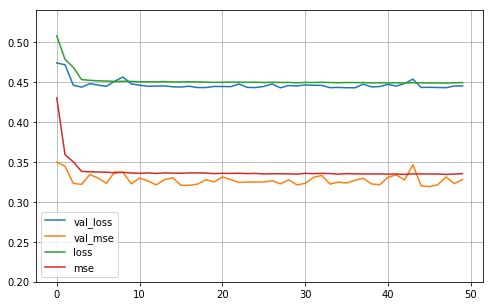

In [19]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 0.54) # set the vertical range to [0-1]
plt.show()

In [20]:
# Computing the absolute percent error
APE=100*(abs(df_teste['original']-df_teste['predicted'])/df_teste['original'])
df_teste['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
df_teste.head()

The Accuracy of ANN model is: 97.8524075994072


,generator_speed,nacelle,original,predicted,APE
0,1242.5048,29.280334,62.573334,64.746567,3.473097
1,1440.3514,31.264334,65.407670,65.165146,0.370789
2,1336.6907,29.424667,66.546330,64.836876,2.568818
3,1430.4870,28.319500,63.864666,64.570671,1.105471
4,1452.3634,28.371166,63.637500,64.562874,1.454133


In [21]:
df_new= df.merge(df_teste, how='left',on=['generator_speed','nacelle'])
df_new= df_new.dropna()
df_new

,sample_time,power,outdoor_temp,generator_speed,nacelle,gearbox_bearing,original,predicted,APE
105120,2020-06-13 12:20:00+00:00,1471.88950,21.637331,1242.50480,29.280334,62.573334,62.573334,64.746567,3.473097
105121,2020-06-13 12:30:00+00:00,2269.15700,21.958326,1440.35140,31.264334,65.407670,65.407670,65.165146,0.370789
105122,2020-06-13 12:40:00+00:00,1848.58220,22.357782,1336.69070,29.424667,66.546330,66.546330,64.836876,2.568818
105123,2020-06-13 12:50:00+00:00,2222.08180,22.545212,1430.48700,28.319500,63.864666,63.864666,64.570671,1.105471
105124,2020-06-13 13:00:00+00:00,2330.56880,22.536217,1452.36340,28.371166,63.637500,63.637500,64.562874,1.454133
...,...,...,...,...,...,...,...,...,...
129808,2020-12-31 21:20:00+00:00,547.44770,30.756876,922.46820,39.576168,66.319000,66.319000,64.327019,3.003636
129809,2020-12-31 21:30:00+00:00,463.78204,30.680513,886.92694,39.403336,65.438670,65.438670,63.483402,2.987939
129810,2020-12-31 21:40:00+00:00,472.37115,30.551275,884.98804,39.182835,64.908165,64.908165,63.365112,2.377286
129811,2020-12-31 21:50:00+00:00,579.70490,30.431310,939.09460,39.011333,64.766170,64.766170,64.550331,0.333259


In [23]:
df_teste['error']=df_teste['predicted'] - df_teste['original']
print(df_teste)

       generator_speed    nacelle   original  predicted       APE     error
0           1242.50480  29.280334  62.573334  64.746567  3.473097  2.173233
1           1440.35140  31.264334  65.407670  65.165146  0.370789 -0.242524
2           1336.69070  29.424667  66.546330  64.836876  2.568818 -1.709454
3           1430.48700  28.319500  63.864666  64.570671  1.105471  0.706005
4           1452.36340  28.371166  63.637500  64.562874  1.454133  0.925374
...                ...        ...        ...        ...       ...       ...
24689        886.92694  39.403336  65.438670  63.483402  2.987939 -1.955268
24690        884.98804  39.182835  64.908165  63.365112  2.377286 -1.543053
24691        939.09460  39.011333  64.766170  64.550331  0.333259 -0.215839
24692        927.96220  38.867000  64.691170  64.280151  0.635355 -0.411019
24693        352.50555  40.111168  63.903500  58.761703  8.046189 -5.141797

[24694 rows x 6 columns]


Mean Error: 0.28713752700412437
MAE: 1.3620790546813057
RMSE: 1.8201222834219202


/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/ingridsimoes/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/ingridsimoes/anaconda3/lib/python3.7/site-pack

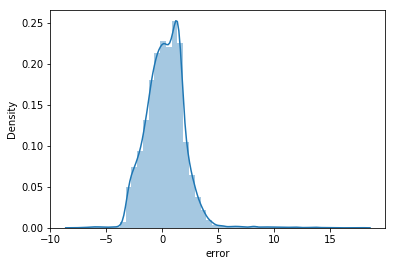

In [24]:
%matplotlib inline
import seaborn as sns
print('Mean Error:', np.mean(df_teste['error']))
print('MAE:', np.mean(np.abs(df_teste['error'])))
print('RMSE:', np.sqrt(np.mean(df_teste['error']**2)))

sns.distplot(df_teste['error'])

In [25]:
import numpy as np
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print(median_absolute_error(df_teste['original'], df_teste['predicted']))
print(mean_squared_error(df_teste['original'], df_teste['predicted']))
print(r2_score(df_teste['original'], df_teste['predicted']))


1.1571112692871104
3.3128451266090293
0.41221902342138594


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(30, 12))
plt.grid(True)
plt.gca 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


mean, dev = stats.norm.fit(df_teste['error'])

df_teste['error_gaussiano']=stats.norm.pdf(df_teste['error'], mean, dev)
print(df_teste)

In [ ]:
mean, dev = stats.norm.fit(df_teste['error_gaussiano'])
upper=stats.norm.ppf(0.9, loc=mean, scale=dev)
lower =stats.norm.ppf(0.1, loc=mean, scale=dev)
print(lower)
print(upper)

In [ ]:
error3= df_teste[df_teste['error']>=upper]
error3

In [ ]:
error2= df_teste[df_teste['error']<=lower]
error2

In [ ]:
error3= error3.reset_index(drop=True)
error2 = error2.reset_index(drop=True)
df_error= pd.concat([error3, error2], ignore_index=True)
df_error

In [ ]:
df_new= df_error.merge(df, how='left',on=['power','outdoor_temp','generator_speed','nacelle'])
df_new= df_new.dropna()
df_new

In [ ]:
df_new['sample_time'] = pd.to_datetime(df_new['sample_time'])
df_new['sample_time']= df_new.sample_time.dt.strftime("%Y-%m-%d")
df_new = df_new.groupby(['sample_time']).count()

In [ ]:
df_new


In [ ]:
df_alarm= df_new[df_new['error_gaussiano']>95]
df_alarm.index.size
df_alarm